In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
import glob

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
model = "Multimodel"
print(model)
experiment = "ssp585"
print(experiment)

Multimodel
ssp585



## Ice region plot

In [5]:
variable = "siconc"

In [6]:
files=glob.glob("Data/{}_*_ice_extent.nc".format(variable))
files = sorted(files)
files

['Data/siconc_ACCESS-ESM1-5_ice_extent.nc',
 'Data/siconc_CMCC-ESM2_ice_extent.nc',
 'Data/siconc_EC-Earth3-CC_ice_extent.nc',
 'Data/siconc_IPSL-CM6A-LR_ice_extent.nc',
 'Data/siconc_MPI-ESM1-2-HR_ice_extent.nc']

In [7]:
for i in range(5):
    globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()
    
    nc = xarray.open_dataset(files[i])
    nc = nc.sel(lat = slice(-90, -20))

    lat = nc['lat'].values 
    lon = nc['lon'].values
    globals()[f"var{i}"] = nc[variable].values
    
    globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

KeyboardInterrupt: 

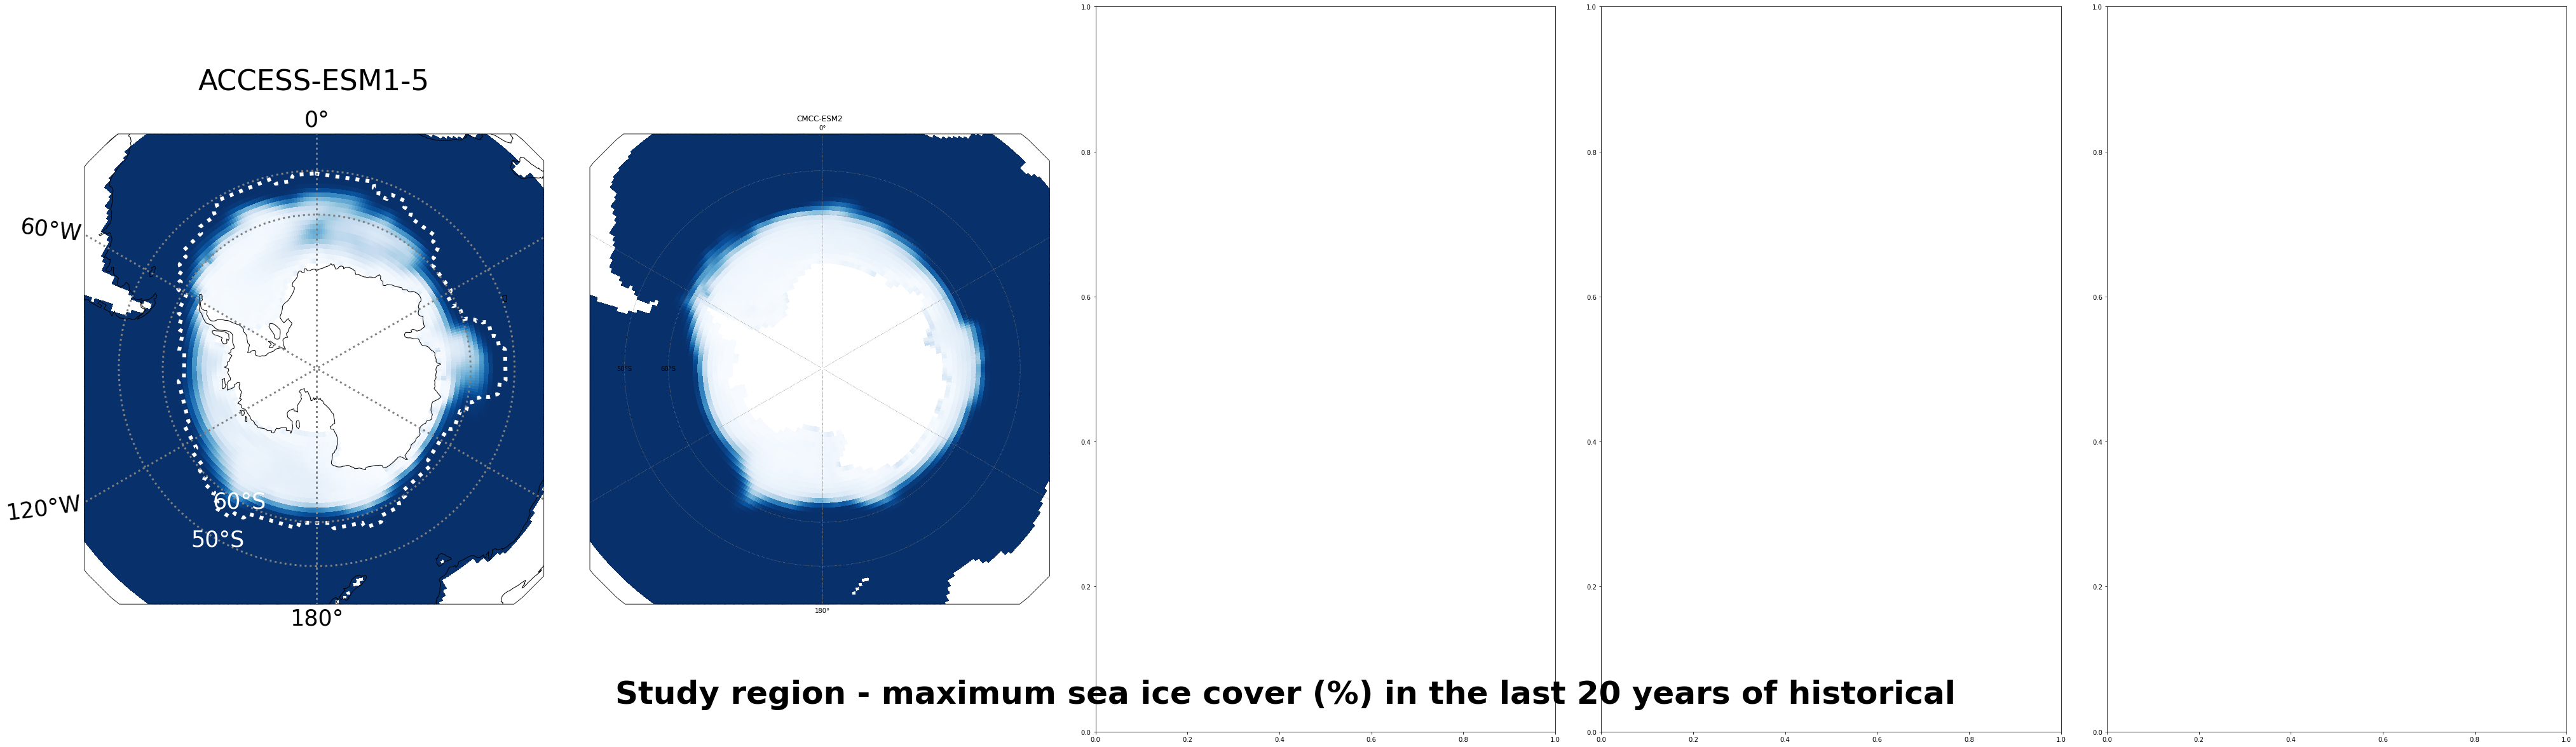

In [8]:
fig = plt.figure(figsize=(70,21))
fig.subplots_adjust(wspace = 0.1)
plt.suptitle("Study region - maximum sea ice cover (%) in the last 20 years of historical", fontweight = "bold", y=0.18, fontsize = 50)

gs = GridSpec(1, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[0, 4])


## Plot 1
ax1 = plt.subplot(1, 5, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax1.set_title("{}".format(model0), fontsize = 45, pad = 30)

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                    linewidth = 3,
                  y_inline = True,
                  x_inline = False) 

gl1.left_labels = True
gl1.right_labels = False

gl1.xlabel_style = {'size': 35}
gl1.ylabel_style = {'color' : 'white', 'size': 35}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-150:
            tx.set_position([-150, xy[1]])


p = ax1.pcolor(x0, y0, var0,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax1.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved_more.shp".format(model0))
ax1.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 6)

## Plot 2
ax2 = plt.subplot(1, 5, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax2.set_title("{}".format(model1))

gl1 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False
gl1.left_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])


p = ax2.pcolor(x1, y1, var1,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax2.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved.shp".format(model1))
ax2.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 2)

## Plot 3
ax3 = plt.subplot(1, 5, 3, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax3.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax3.set_title("{}".format(model2))

gl1 = ax3.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False
gl1.left_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])


p = ax3.pcolor(x2, y2, var2,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax3.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved.shp".format(model2))
ax3.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 2)

## Plot 4
ax4 = plt.subplot(1, 5, 4, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax4.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax4.set_title("{}".format(model3))

gl1 = ax4.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False
gl1.left_labels = False

gl1.xlabel_style = {'size': 35}
gl1.ylabel_style = {'color' : 'white', 'size': 35}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])


p = ax4.pcolor(x3, y3, var3,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax4.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved.shp".format(model3))
ax4.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 2)

## Plot 5
ax5 = plt.subplot(1, 5, 5, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax5.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax5.set_title("{}".format(model4))

gl1 = ax5.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = True
gl1.left_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])


p = ax5.pcolor(x4, y4, var4,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax5.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved.shp".format(model4))
ax5.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 2)

#fig.subplots_adjust(right=0.9) # Move all subplots 0.2 away from the right
#cbar_ax = fig.add_axes([0.94, 0.27, 0.018, 0.48]) # Define position and size of new element (distance from left, distance from bottom, width, height)
#fig.colorbar(p, cax=cbar_ax)

cax = fig.add_axes([ax5.get_position().x1+0.033, ax5.get_position().y0, 0.016, ax5.get_position().height])
plt.colorbar(p, cax=cax) 

plt.savefig("output/Multimodel/ice_choice.png")

plt.show()

## 
## epc100

### Percentage change


In [ ]:
variable = "epc100"
print(variable)

epc100


In [8]:
files=glob.glob("Data/{}_*_percentage_whole.nc".format(variable))
files

['Data/epc100_CMCC-ESM2_ssp585_percentage_whole.nc',
 'Data/epc100_ACCESS-ESM1-5_ssp585_percentage_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_percentage_whole.nc',
 'Data/epc100_MPI-ESM1-2-HR_ssp585_percentage_whole.nc',
 'Data/epc100_EC-Earth3-CC_ssp585_percentage_whole.nc']

In [9]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 5
File contents:
                                                     variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                            
Data/epc100_CMCC-ESM2_ssp585_percentage_whole.nc       epc100   None    18000        1      None  None       F32
Data/epc100_ACCESS-ESM1-5_ssp585_percentage_whole.nc   epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_percentage_whole.nc    epc100   None    18000        1      None  None       F32
Data/epc100_MPI-ESM1-2-HR_ssp585_percentage_whole.nc   epc100   None    18000        1      None  None       F32
Data/epc100_EC-Earth3-CC_ssp585_percentage_whole.nc    epc100   None    18000        1      None  None       F32

In [10]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_percentage_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 ...
Data variables:
    epc100   (lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Aug 11 21:24:13 2022: cdo -L --sortname -z zip_9 -ensme...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

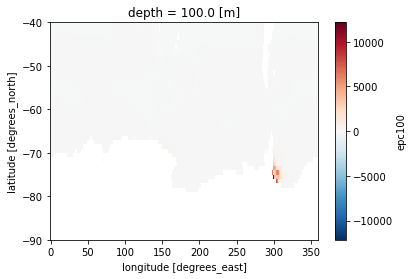

In [11]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_whole.nc".format(variable, model, experiment))
nc[variable].plot()
nc

#### Zonal mean


In [22]:
files=glob.glob("Data/Shape/{}_*_{}_inc.nc".format(variable, experiment))
files

['Data/Shape/epc100_ACCESS-ESM1-5_ssp585_inc.nc',
 'Data/Shape/epc100_CMCC-ESM2_ssp585_inc.nc',
 'Data/Shape/epc100_EC-Earth3-CC_ssp585_inc.nc',
 'Data/Shape/epc100_IPSL-CM6A-LR_ssp585_inc.nc',
 'Data/Shape/epc100_MPI-ESM1-2-HR_ssp585_inc.nc']

In [23]:
a = {}
for i in range(len(files)):
    nc = xarray.open_dataset(files[i])
    values = nc["inc"].values
    values = np.nan_to_num(values, nan=0)
    print(values)
    a[i] = values
    print(i)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
4


In [24]:
mean_inc = (a[0] + a[1] + a[2] + a[3] + a[4])/5

In [25]:
mean_inc[mean_inc < 0.8] = 0

In [26]:
sum(mean_inc[mean_inc < 0.8])

0.0

In [27]:
mean_inc.shape

(180, 360)

In [28]:
files=glob.glob("Data/Shape/{}_*_{}_dec.nc".format(variable, experiment))
files

['Data/Shape/epc100_ACCESS-ESM1-5_ssp585_dec.nc',
 'Data/Shape/epc100_CMCC-ESM2_ssp585_dec.nc',
 'Data/Shape/epc100_EC-Earth3-CC_ssp585_dec.nc',
 'Data/Shape/epc100_IPSL-CM6A-LR_ssp585_dec.nc',
 'Data/Shape/epc100_MPI-ESM1-2-HR_ssp585_dec.nc']

In [29]:
a = {}
for i in range(len(files)):
    nc = xarray.open_dataset(files[i])
    values = nc["dec"].values
    values = np.nan_to_num(values, nan=0)
    print(values)
    a[i] = values
    print(i)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
4


In [30]:
mean_dec = (a[0] + a[1] + a[2] + a[3] + a[4])/5

In [31]:
mean_dec[mean_dec < 0.8] = 0

In [32]:
sum(mean_dec[mean_dec < 0.8])

0.0

In [33]:
mean_dec.shape

(180, 360)

In [34]:
agree = mean_dec + mean_inc

In [35]:
agree[agree == 0] = np.nan

In [36]:
agree

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [37]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 5
File contents:
                                              variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                     
Data/Shape/epc100_ACCESS-ESM1-5_ssp585_dec.nc      dec   None    64800        1      None  None       F32
Data/Shape/epc100_CMCC-ESM2_ssp585_dec.nc          dec   None    64800        1      None  None       F32
Data/Shape/epc100_EC-Earth3-CC_ssp585_dec.nc       dec   None    64800        1      None  None       F32
Data/Shape/epc100_IPSL-CM6A-LR_ssp585_dec.nc       dec   None    64800        1      None  None       F32
Data/Shape/epc100_MPI-ESM1-2-HR_ssp585_dec.nc      dec   None    64800        1      None  None       F32

In [38]:
percentage.ensemble_mean()
percentage.to_nc("Data/Shape/{}_{}_{}_inc.nc".format(variable, model, experiment),overwrite = True)

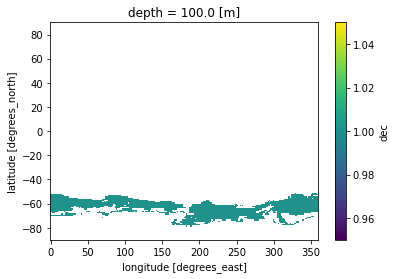

In [40]:
shade = xarray.open_dataset("Data/Shape/{}_{}_{}_inc.nc".format(variable, model, experiment))
shade["dec"].plot()

In [41]:
shade["mean_inc"] = (("lat","lon"), mean_inc)

In [42]:
shade["mean_dec"] = (("lat","lon"), mean_dec)

In [43]:
shade["agree"] = (("lat","lon"), agree)

In [44]:
shade

<xarray.Dataset>
Dimensions:     (lon: 360, lat: 180, bnds: 2)
Coordinates:
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth       float64 ...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 ...
    dec         (lat, lon) float32 ...
    mean_inc    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    mean_dec    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    agree       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Aug 11 21:26:13 2022: cdo -L --sortname -z zip_9 -ensme...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

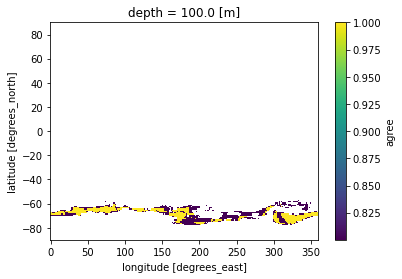

In [45]:
shade["agree"].plot()

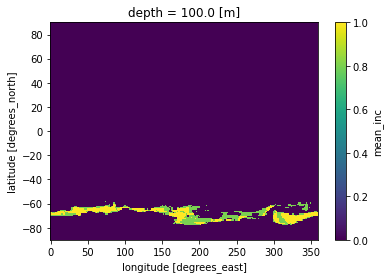

In [46]:
shade["mean_inc"].plot()

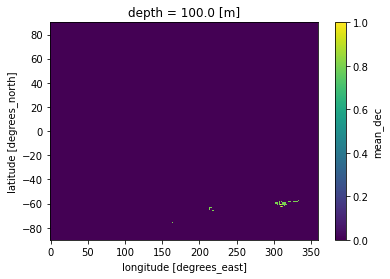

In [47]:
shade["mean_dec"].plot()

#### Plotting

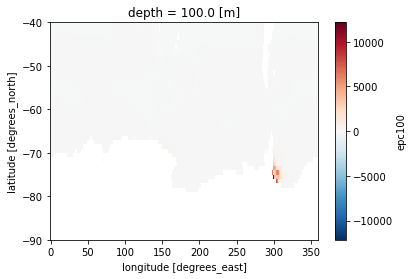

In [48]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_whole.nc".format(variable, model, experiment))
nc[variable].plot()

In [49]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc[variable].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)

var_upper = np.nanquantile(var[var>0], 0.9)
var_lower = np.nanquantile(var[var<0], 0.1)
label = abs(max([var_upper, var_lower], key = abs))
print(var_upper, var_lower)
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

31.367579650878906 -10.587460041046143
12159.164 -28.098469


In [50]:
files=glob.glob("Shapes/*_ice_margin_remapped_improved.shp")
files

['Shapes/CMCC-ESM2_ice_margin_remapped_improved.shp',
 'Shapes/IPSL-CM6A-LR_ice_margin_remapped_improved.shp',
 'Shapes/MPI-ESM1-2-HR_ice_margin_remapped_improved.shp',
 'Shapes/ACCESS-ESM1-5_ice_margin_remapped_improved.shp',
 'Shapes/EC-Earth3-CC_ice_margin_remapped_improved.shp']

In [51]:
lat_shade = shade['lat'].values 
lon_shade = shade['lon'].values
inc = shade["mean_inc"].values
dec = shade["mean_dec"].values
agree = shade["agree"].values


In [58]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

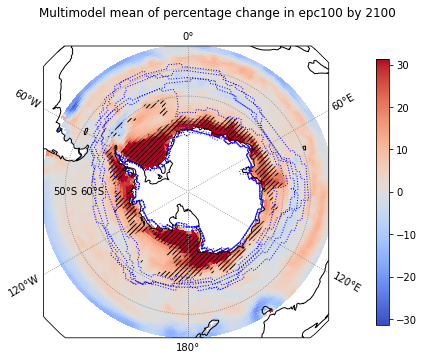

In [52]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


#plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



#ax1.title.set_text("Multimodel percentage change in epc100 by 2100")

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )

density = 5
i = ax1.contourf(lon_shade, lat_shade, agree, transform= cartopy.crs.PlateCarree(),
    colors='none', hatches=[density*'/',density*'/'])

# d = ax1.contourf(lon_shade, lat_shade, dec, transform= cartopy.crs.PlateCarree(),
#     colors='none', hatches=[density*'*',density*'*'])

ax1.coastlines()

# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)

# ax1.set_boundary(circle, transform=ax1.transAxes)

for i in files:
    ice = gpd.read_file(i)
    ax1.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'blue',
                      linestyle = ':',
                      linewidth = 1)

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.suptitle("Multimodel mean of percentage change in epc100 by 2100", fontsize = 12, y = 0.87, x = 0.47)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

### Timeseries

In [70]:
files=glob.glob("csv/*_{}_whole.csv".format(variable))
files

['csv/ACCESS-ESM1-5_epc100_whole.csv',
 'csv/CMCC-ESM2_epc100_whole.csv',
 'csv/EC-Earth3-CC_epc100_whole.csv',
 'csv/IPSL-CM6A-LR_epc100_whole.csv',
 'csv/MPI-ESM1-2-HR_epc100_whole.csv']

In [71]:
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)
type(df)

     Year        Annual        Summer        Winter          Model
0    2015  2.645978e-08  7.376076e-08  7.804582e-10  ACCESS-ESM1-5
1    2016  2.615075e-08  7.280450e-08  7.314332e-10  ACCESS-ESM1-5
2    2017  2.352553e-08  6.483753e-08  6.706267e-10  ACCESS-ESM1-5
3    2018  2.546953e-08  7.025123e-08  7.025097e-10  ACCESS-ESM1-5
4    2019  2.341411e-08  6.520531e-08  7.242160e-10  ACCESS-ESM1-5
..    ...           ...           ...           ...            ...
425  2096  4.636749e-08  1.382442e-07  7.456495e-10  MPI-ESM1-2-HR
426  2097  4.315267e-08  1.270635e-07  8.063698e-10  MPI-ESM1-2-HR
427  2098  4.367880e-08  1.297439e-07  8.212037e-10  MPI-ESM1-2-HR
428  2099  4.372008e-08  1.287595e-07  8.289716e-10  MPI-ESM1-2-HR
429  2100  4.298885e-08  1.292525e-07  7.690735e-10  MPI-ESM1-2-HR

[430 rows x 5 columns]


pandas.core.frame.DataFrame

#### Annual

In [72]:
Annual = df.drop(columns=["Summer", "Winter"])
Annual

,Year,Annual,Model
0,2015,2.645978e-08,ACCESS-ESM1-5
1,2016,2.615075e-08,ACCESS-ESM1-5
2,2017,2.352553e-08,ACCESS-ESM1-5
3,2018,2.546953e-08,ACCESS-ESM1-5
4,2019,2.341411e-08,ACCESS-ESM1-5
...,...,...,...
425,2096,4.636749e-08,MPI-ESM1-2-HR
426,2097,4.315267e-08,MPI-ESM1-2-HR
427,2098,4.367880e-08,MPI-ESM1-2-HR
428,2099,4.372008e-08,MPI-ESM1-2-HR


In [73]:
Annual = Annual.pivot(index="Year", columns="Model", values="Annual")

In [74]:
Mean = {"Multimodel Mean": Annual.mean(axis=1)}
Mean = pd.DataFrame(Mean)
Mean

,Multimodel Mean
Year,
2015,4.679633e-08
2016,4.790606e-08
2017,4.749232e-08
2018,4.677466e-08
2019,4.657413e-08
...,...
2096,5.302729e-08
2097,5.221162e-08
2098,5.243679e-08


In [75]:
Annual

Model,ACCESS-ESM1-5,CMCC-ESM2,EC-Earth3-CC,IPSL-CM6A-LR,MPI-ESM1-2-HR
Year,,,,,
2015,2.645978e-08,7.032623e-08,4.816136e-08,4.641644e-08,4.261783e-08
2016,2.615075e-08,7.180962e-08,4.921223e-08,4.769978e-08,4.465793e-08
2017,2.352553e-08,7.189691e-08,4.903676e-08,4.969604e-08,4.330636e-08
2018,2.546953e-08,6.816416e-08,4.900682e-08,4.977203e-08,4.146077e-08
2019,2.341411e-08,6.906072e-08,4.826463e-08,4.872830e-08,4.340286e-08
...,...,...,...,...,...
2096,3.391489e-08,7.814815e-08,5.711443e-08,4.959149e-08,4.636749e-08
2097,3.265628e-08,8.146019e-08,5.425945e-08,4.952953e-08,4.315267e-08
2098,3.306615e-08,8.223990e-08,5.351312e-08,4.968596e-08,4.367880e-08


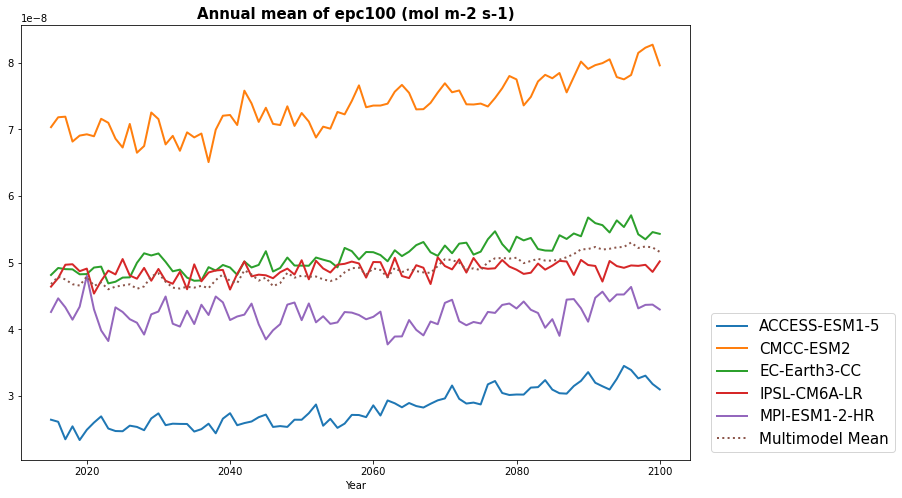

In [76]:
fig,ax = plt.subplots(figsize=(12,8))

plt.title("Annual mean of epc100 (mol m-2 s-1)", fontweight="bold", fontsize = 15)

ax = Annual.plot.line(ax = ax, linewidth = 2)
ax2 = Mean.plot.line(ax = ax, linewidth = 2, linestyle = ":")
ax.legend(loc='lower left', bbox_to_anchor=(1.02, 0), prop={'size':15})

plt.savefig("output/{}/{}_{}_{}_mean_projection_whole.png".format(model, variable, model, experiment), bbox_inches='tight')

plt.show()

#### Season

In [77]:
Summer = df.drop(columns=["Annual", "Winter"])
Summer

,Year,Summer,Model
0,2015,7.376076e-08,ACCESS-ESM1-5
1,2016,7.280450e-08,ACCESS-ESM1-5
2,2017,6.483753e-08,ACCESS-ESM1-5
3,2018,7.025123e-08,ACCESS-ESM1-5
4,2019,6.520531e-08,ACCESS-ESM1-5
...,...,...,...
425,2096,1.382442e-07,MPI-ESM1-2-HR
426,2097,1.270635e-07,MPI-ESM1-2-HR
427,2098,1.297439e-07,MPI-ESM1-2-HR
428,2099,1.287595e-07,MPI-ESM1-2-HR


In [78]:
Summer = Summer.pivot(index="Year", columns="Model", values="Summer")

In [79]:
Summer_Mean = {"Multimodel Mean": Summer.mean(axis=1)}
Summer_Mean = pd.DataFrame(Summer_Mean)
Summer_Mean

,Multimodel Mean
Year,
2015,1.006621e-07
2016,1.032114e-07
2017,1.022285e-07
2018,1.011861e-07
2019,1.015746e-07
...,...
2096,1.146383e-07
2097,1.112133e-07
2098,1.118120e-07


In [80]:
Summer

Model,ACCESS-ESM1-5,CMCC-ESM2,EC-Earth3-CC,IPSL-CM6A-LR,MPI-ESM1-2-HR
Year,,,,,
2015,7.376076e-08,8.445667e-08,1.049210e-07,1.113828e-07,1.287895e-07
2016,7.280450e-08,8.593315e-08,1.047210e-07,1.164521e-07,1.361462e-07
2017,6.483753e-08,8.731174e-08,1.078239e-07,1.191069e-07,1.320627e-07
2018,7.025123e-08,8.369094e-08,1.076170e-07,1.198355e-07,1.245359e-07
2019,6.520531e-08,8.617058e-08,1.060138e-07,1.178402e-07,1.326430e-07
...,...,...,...,...,...
2096,9.687537e-08,1.053150e-07,1.184595e-07,1.142976e-07,1.382442e-07
2097,9.322735e-08,1.110673e-07,1.113058e-07,1.134029e-07,1.270635e-07
2098,9.261745e-08,1.122407e-07,1.117904e-07,1.126674e-07,1.297439e-07


In [81]:
Winter = df.drop(columns=["Annual", "Summer"])
Winter

,Year,Winter,Model
0,2015,7.804582e-10,ACCESS-ESM1-5
1,2016,7.314332e-10,ACCESS-ESM1-5
2,2017,6.706267e-10,ACCESS-ESM1-5
3,2018,7.025097e-10,ACCESS-ESM1-5
4,2019,7.242160e-10,ACCESS-ESM1-5
...,...,...,...
425,2096,7.456495e-10,MPI-ESM1-2-HR
426,2097,8.063698e-10,MPI-ESM1-2-HR
427,2098,8.212037e-10,MPI-ESM1-2-HR
428,2099,8.289716e-10,MPI-ESM1-2-HR


In [82]:
Winter = Winter.pivot(index="Year", columns="Model", values="Winter")

In [83]:
Winter_Mean = {"Multimodel Mean": Winter.mean(axis=1)}
Winter_Mean = pd.DataFrame(Winter_Mean)
Winter_Mean

,Multimodel Mean
Year,
2015,1.461691e-08
2016,1.474082e-08
2017,1.473394e-08
2018,1.409239e-08
2019,1.383419e-08
...,...
2096,1.430767e-08
2097,1.481362e-08
2098,1.489135e-08


In [84]:
Winter

Model,ACCESS-ESM1-5,CMCC-ESM2,EC-Earth3-CC,IPSL-CM6A-LR,MPI-ESM1-2-HR
Year,,,,,
2015,7.804582e-10,5.451987e-08,8.522570e-09,8.392358e-09,8.692821e-10
2016,7.314332e-10,5.527798e-08,8.632102e-09,8.190228e-09,8.723648e-10
2017,6.706267e-10,5.503840e-08,8.637547e-09,8.393243e-09,9.298960e-10
2018,7.025097e-10,5.197991e-08,8.530354e-09,8.332639e-09,9.165420e-10
2019,7.242160e-10,5.062408e-08,8.595012e-09,8.353246e-09,8.743987e-10
...,...,...,...,...,...
2096,6.687990e-10,5.374897e-08,8.006501e-09,8.368434e-09,7.456495e-10
2097,7.257636e-10,5.603041e-08,8.191797e-09,8.313781e-09,8.063698e-10
2098,6.770727e-10,5.618839e-08,8.142265e-09,8.627818e-09,8.212037e-10


/tmp/ipykernel_222803/3964821421.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


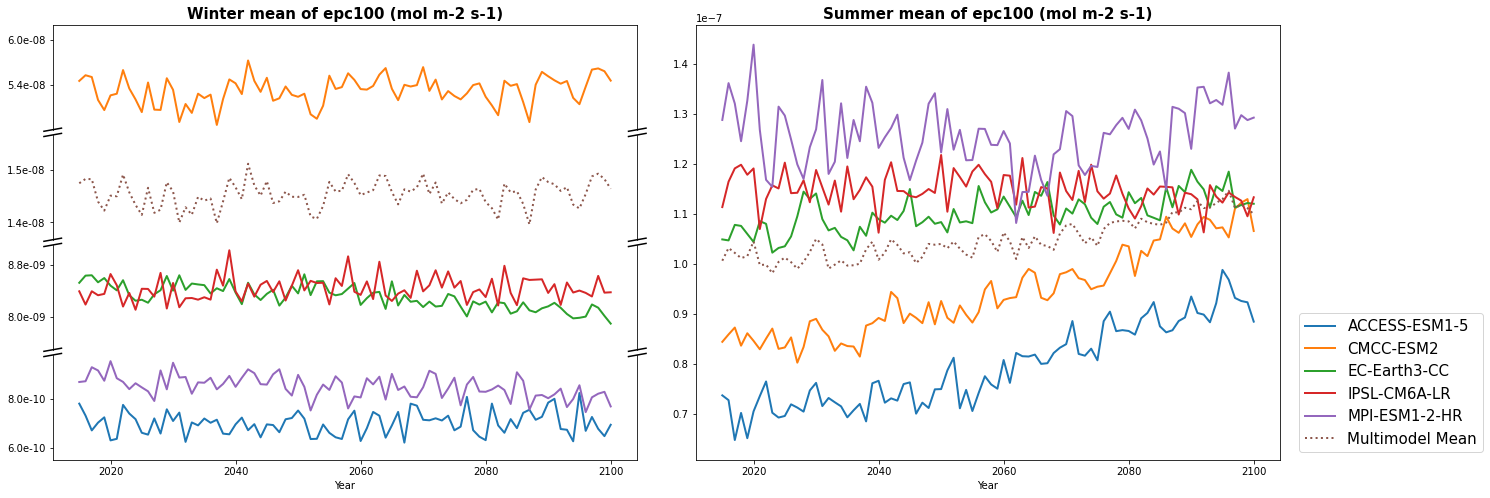

In [85]:
fig = plt.figure(constrained_layout=True, figsize=(22,8))
fig.subplots_adjust(hspace=0.05, wspace = 0.1)


gs = GridSpec(4, 2, figure=fig, height_ratios=[1,1,1,1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[3, 0])
ax5 = fig.add_subplot(gs[:,1])

ax5.set_title("Summer mean of epc100 (mol m-2 s-1)", fontweight = "bold", fontsize = 15)

Summer.plot.line(ax = ax5, linewidth = 2, legend=False)
Summer_Mean.plot.line(ax = ax5, linewidth = 2, linestyle = ":", legend=False)
ax5.legend(loc='lower left', bbox_to_anchor=(1.02, 0), prop={'size':15})

ax1.set_title("Winter mean of epc100 (mol m-2 s-1)", fontweight = "bold", fontsize = 15)

Winter.plot.line(ax = ax1, linewidth = 2, legend=False)
Winter.plot.line(ax = ax2, linewidth = 2, legend=False)
Winter_Mean.plot.line(ax = ax2, linewidth = 2, legend=False, linestyle = ":")
Winter.plot.line(ax = ax3, linewidth = 2, legend=False)
Winter.plot.line(ax = ax4, linewidth = 2, legend=False)


ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1e'))
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1e'))
ax3.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1e'))
ax4.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1e'))


ax1.set_ylim(4.8e-8, 6.2e-8) 
ax1.set_yticks([5.4e-8, 6e-8])
#ax1.yaxis.set_major_locator(mticker.MaxNLocator(2))
ax2.set_ylim(1.3e-8, 1.6e-8)
ax2.yaxis.set_major_locator(mticker.MaxNLocator(2))
ax3.set_ylim(7.5e-9, 9.1e-9)
ax3.set_yticks([8e-9, 8.8e-9])
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(2))
ax4.set_ylim(5.5e-10, 9.8e-10)
ax4.yaxis.set_major_locator(mticker.MaxNLocator(2))

ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

d = .015  # how big to make the diagonal lines in axes coordinates (length of line)
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal 
# (length along x axis starting d from the left edge of axis, height along y axis starting d from bottom of axis) 
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 


kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax3.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax4.transAxes)  # switch to the bottom axes
ax4.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax4.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)


plt.savefig("output/{}/{}_{}_{}_mean_projection_season.png".format(model, variable, model, experiment), bbox_inches='tight')
plt.show()

In [86]:
Multimodel = Mean.merge(Summer_Mean, on = "Year", how='left')
Multimodel = Multimodel.merge(Winter_Mean, on = "Year", how= "left")
Multimodel

,Multimodel Mean_x,Multimodel Mean_y,Multimodel Mean
Year,,,
2015,4.679633e-08,1.006621e-07,1.461691e-08
2016,4.790606e-08,1.032114e-07,1.474082e-08
2017,4.749232e-08,1.022285e-07,1.473394e-08
2018,4.677466e-08,1.011861e-07,1.409239e-08
2019,4.657413e-08,1.015746e-07,1.383419e-08
...,...,...,...
2096,5.302729e-08,1.146383e-07,1.430767e-08
2097,5.221162e-08,1.112133e-07,1.481362e-08
2098,5.243679e-08,1.118120e-07,1.489135e-08


In [87]:
Multimodel = Multimodel.rename({'Multimodel Mean_x': 'Annual', 'Multimodel Mean_y': 'Summer', "Multimodel Mean" : "Winter"}, axis=1)
Multimodel

,Annual,Summer,Winter
Year,,,
2015,4.679633e-08,1.006621e-07,1.461691e-08
2016,4.790606e-08,1.032114e-07,1.474082e-08
2017,4.749232e-08,1.022285e-07,1.473394e-08
2018,4.677466e-08,1.011861e-07,1.409239e-08
2019,4.657413e-08,1.015746e-07,1.383419e-08
...,...,...,...
2096,5.302729e-08,1.146383e-07,1.430767e-08
2097,5.221162e-08,1.112133e-07,1.481362e-08
2098,5.243679e-08,1.118120e-07,1.489135e-08


In [88]:
Multimodel.to_csv("csv/{}_{}_whole.csv".format(model, variable), index = True, header=True)

In [89]:
df = pd.read_csv("csv/{}_{}_whole.csv".format(model, variable))
df

,Year,Annual,Summer,Winter
0,2015,4.679633e-08,1.006621e-07,1.461691e-08
1,2016,4.790606e-08,1.032114e-07,1.474082e-08
2,2017,4.749232e-08,1.022285e-07,1.473394e-08
3,2018,4.677466e-08,1.011861e-07,1.409239e-08
4,2019,4.657413e-08,1.015746e-07,1.383419e-08
...,...,...,...,...
81,2096,5.302729e-08,1.146383e-07,1.430767e-08
82,2097,5.221162e-08,1.112133e-07,1.481362e-08
83,2098,5.243679e-08,1.118120e-07,1.489135e-08
84,2099,5.228856e-08,1.111632e-07,1.473556e-08


## CSV


### Whole

In [9]:
df = pd.DataFrame(columns=['Percentage','Correlation','p-value', 'Kendall', 'p_value_k', 'Variable','Model','Export'])
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export


In [159]:
df = pd.read_csv("csv/Whole.csv")
df = df.drop_duplicates(keep='first', ignore_index=True)
df = df.replace("Mixed layer depth", "MLD")
df = df.replace("Surface temperature", "SST")
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export
0,-2.468427,0.078658,5.533611e-08,0.087916,9.538572e-20,Iron,ACCESS-ESM1-5,98.823282
1,27.236971,0.962248,0.000000e+00,0.920251,0.000000e+00,NPP,ACCESS-ESM1-5,98.823282
2,-15.450726,-0.002600,8.576861e-01,-0.254790,4.433980e-153,MLD,ACCESS-ESM1-5,98.823282
3,-4.081037,-0.202379,3.601046e-45,-0.377256,0.000000e+00,Nitrate,ACCESS-ESM1-5,98.823282
4,10.126846,0.232803,1.368212e-59,0.699134,0.000000e+00,PAR,ACCESS-ESM1-5,98.823282
5,-60.337940,0.194737,6.865782e-42,0.471775,0.000000e+00,Sea ice cover,ACCESS-ESM1-5,98.823282
6,0.420085,-0.217568,4.287633e-52,-0.180938,3.648884e-78,SST,ACCESS-ESM1-5,98.823282
7,9.431211,0.480553,6.532724e-259,0.279010,2.269805e-173,Iron,CMCC-ESM2,75.011106
8,16.154680,0.435791,4.276359e-208,0.616666,0.000000e+00,NPP,CMCC-ESM2,75.011106
9,16.627369,0.468408,2.295820e-244,0.644462,0.000000e+00,Diatom,CMCC-ESM2,75.011106


#### Pearson vs Kendall 

In [160]:
#correlation = df[["Correlation", "Kendall"]]
correlation = df.melt(id_vars= ["Variable", "Model"], value_vars=["Correlation", "Kendall"], var_name="Type", value_name="Correlation")
correlation

/tmp/ipykernel_104331/440819743.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


,Variable,Model,Type,Correlation
0,Iron,ACCESS-ESM1-5,Correlation,0.078658
1,NPP,ACCESS-ESM1-5,Correlation,0.962248
2,MLD,ACCESS-ESM1-5,Correlation,-0.002600
3,Nitrate,ACCESS-ESM1-5,Correlation,-0.202379
4,PAR,ACCESS-ESM1-5,Correlation,0.232803
...,...,...,...,...
69,MLD,MPI-ESM1-2-HR,Kendall,-0.067228
70,Nitrate,MPI-ESM1-2-HR,Kendall,-0.516408
71,PAR,MPI-ESM1-2-HR,Kendall,0.557049
72,Sea ice cover,MPI-ESM1-2-HR,Kendall,0.078122


In [161]:
correlation.to_csv("csv/Correlation.csv")

#### Pearson only 

In [162]:
pearson = df.drop(columns = ["Kendall", "p_value_k"])
pearson.head()

,Percentage,Correlation,p-value,Variable,Model,Export
0,-2.468427,0.078658,5.533611e-08,Iron,ACCESS-ESM1-5,98.823282
1,27.236971,0.962248,0.000000e+00,NPP,ACCESS-ESM1-5,98.823282
2,-15.450726,-0.002600,8.576861e-01,MLD,ACCESS-ESM1-5,98.823282
3,-4.081037,-0.202379,3.601046e-45,Nitrate,ACCESS-ESM1-5,98.823282
4,10.126846,0.232803,1.368212e-59,PAR,ACCESS-ESM1-5,98.823282


In [163]:
pearson.to_csv("csv/Whole_pearson.csv")

#### Presenting

In [164]:
table = df.drop(columns = ["Export", "Kendall", "p_value_k"])
#table = table.replace("dfe", "dfeos")
table.head()

,Percentage,Correlation,p-value,Variable,Model
0,-2.468427,0.078658,5.533611e-08,Iron,ACCESS-ESM1-5
1,27.236971,0.962248,0.000000e+00,NPP,ACCESS-ESM1-5
2,-15.450726,-0.002600,8.576861e-01,MLD,ACCESS-ESM1-5
3,-4.081037,-0.202379,3.601046e-45,Nitrate,ACCESS-ESM1-5
4,10.126846,0.232803,1.368212e-59,PAR,ACCESS-ESM1-5


In [165]:
table = table.round({"Correlation":3, "p-value":3, "Percentage":2})
table.head()

,Percentage,Correlation,p-value,Variable,Model
0,-2.47,0.079,0.000,Iron,ACCESS-ESM1-5
1,27.24,0.962,0.000,NPP,ACCESS-ESM1-5
2,-15.45,-0.003,0.858,MLD,ACCESS-ESM1-5
3,-4.08,-0.202,0.000,Nitrate,ACCESS-ESM1-5
4,10.13,0.233,0.000,PAR,ACCESS-ESM1-5


In [166]:
table["asterisk"] = ""
table.head()

for i in range(len(table["p-value"])):
    if table["p-value"][i] > 0.05:
        table["asterisk"][i] = " "
    if 0.05 >= table["p-value"][i] > 0.01:
        table["asterisk"][i] = "*"
    if 0.01 >= table["p-value"][i] > 0.001:
        table["asterisk"][i] = "**"
    if table["p-value"][i] <= 0.001:
        table["asterisk"][i] = "***"
        
table.head()

/tmp/ipykernel_104331/2186864484.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/2186864484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Percentage,Correlation,p-value,Variable,Model,asterisk
0,-2.47,0.079,0.000,Iron,ACCESS-ESM1-5,***
1,27.24,0.962,0.000,NPP,ACCESS-ESM1-5,***
2,-15.45,-0.003,0.858,MLD,ACCESS-ESM1-5,
3,-4.08,-0.202,0.000,Nitrate,ACCESS-ESM1-5,***
4,10.13,0.233,0.000,PAR,ACCESS-ESM1-5,***


In [167]:
table = table.drop(columns = "p-value")
table.head()

,Percentage,Correlation,Variable,Model,asterisk
0,-2.47,0.079,Iron,ACCESS-ESM1-5,***
1,27.24,0.962,NPP,ACCESS-ESM1-5,***
2,-15.45,-0.003,MLD,ACCESS-ESM1-5,
3,-4.08,-0.202,Nitrate,ACCESS-ESM1-5,***
4,10.13,0.233,PAR,ACCESS-ESM1-5,***


In [168]:
table["Correlation with export (Median percentage change by 2100)"] = table["Correlation"].astype(str) + table["asterisk"].astype(str) + " " + table["Percentage"].astype(str)
table = table.drop(columns = ["Percentage", "Correlation", "asterisk"])
table.head()

,Variable,Model,Correlation with export (Median percentage change by 2100)
0,Iron,ACCESS-ESM1-5,0.079*** -2.47
1,NPP,ACCESS-ESM1-5,0.962*** 27.24
2,MLD,ACCESS-ESM1-5,-0.003 -15.45
3,Nitrate,ACCESS-ESM1-5,-0.202*** -4.08
4,PAR,ACCESS-ESM1-5,0.233*** 10.13


In [169]:
table = table.pivot(index="Model", columns="Variable", values="Correlation with export (Median percentage change by 2100)")
table

Variable,Diatom,Iron,MLD,NPP,Nitrate,PAR,SST,Sea ice cover
Model,,,,,,,,
ACCESS-ESM1-5,NaN,0.079*** -2.47,-0.003 -15.45,0.962*** 27.24,-0.202*** -4.08,0.233*** 10.13,-0.218*** 0.42,0.195*** -60.34
CMCC-ESM2,0.468*** 16.63,0.481*** 9.43,0.147*** -8.44,0.436*** 16.15,0.155*** -6.46,0.361*** 4.46,-0.247*** 0.33,0.219*** -64.7
EC-Earth3-CC,0.945*** 7.0,NaN,0.366*** -14.98,0.933*** 12.73,0.163*** -3.55,0.731*** 5.68,0.216*** 0.5,0.147*** -89.42
IPSL-CM6A-LR,0.98*** -2.07,0.148*** -16.75,-0.22*** -13.35,0.972*** 10.68,-0.548*** -5.9,0.738*** 12.26,-0.293*** 0.53,0.32*** -55.47
MPI-ESM1-2-HR,NaN,-0.675*** -1.58,0.01 -18.06,0.919*** 4.37,-0.652*** 0.08,0.796*** -1.13,0.174*** 0.25,0.186*** -53.12


In [170]:
table.to_csv("csv/Whole_result.csv")

## Zonal

In [13]:
df = pd.DataFrame(columns=['Percentage','Correlation','p-value','Kendall', 'p_value_k','Variable','Model', 'Zone'])
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone


In [194]:
df = pd.read_csv("csv/Zone.csv")
df = df.drop_duplicates(keep='first', ignore_index=True)
df = df.replace("inc", "Inc")
df = df.replace("dec", "Dec")
df = df.replace("Mixed layer depth", "MLD")
df = df.replace("Surface temperature", "SST")
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone
0,0,0,0,-2.462672,0.078637,6.101243e-08,0.087930,1.204600e-19,Iron,ACCESS-ESM1-5,Inc
1,1,1,1,-1.107071,0.651291,1.972036e-11,0.505450,9.982149e-12,Iron,ACCESS-ESM1-5,Dec
2,2,2,2,27.305784,0.962277,0.000000e+00,0.919324,0.000000e+00,NPP,ACCESS-ESM1-5,Inc
3,3,3,3,1.472819,0.973968,1.257004e-54,0.866896,1.725820e-31,NPP,ACCESS-ESM1-5,Dec
4,4,4,4,-15.599908,-0.001912,8.953895e-01,-0.249995,1.365364e-146,MLD,ACCESS-ESM1-5,Inc
...,...,...,...,...,...,...,...,...,...,...,...
69,69,69,69,-5.535353,0.329201,2.061341e-53,0.177982,7.829417e-34,PAR,MPI-ESM1-2-HR,Dec
70,70,70,70,-52.975853,0.243787,5.027780e-51,0.126296,2.899088e-30,Sea ice cover,MPI-ESM1-2-HR,Inc
71,71,71,71,-69.688301,0.104315,2.124549e-06,0.011032,4.591581e-01,Sea ice cover,MPI-ESM1-2-HR,Dec
72,72,72,72,0.254590,0.088261,7.466404e-08,0.105299,7.473247e-22,SST,MPI-ESM1-2-HR,Inc


In [195]:
df.to_csv("csv/Zone.csv")

#### Presenting

In [196]:
table = df.drop(columns = ["Kendall", "p_value_k", "Unnamed: 0", "Unnamed: 0.1"])
table.head()

,Unnamed: 0.2,Percentage,Correlation,p-value,Variable,Model,Zone
0,0,-2.462672,0.078637,6.101243e-08,Iron,ACCESS-ESM1-5,Inc
1,1,-1.107071,0.651291,1.972036e-11,Iron,ACCESS-ESM1-5,Dec
2,2,27.305784,0.962277,0.000000e+00,NPP,ACCESS-ESM1-5,Inc
3,3,1.472819,0.973968,1.257004e-54,NPP,ACCESS-ESM1-5,Dec
4,4,-15.599908,-0.001912,8.953895e-01,MLD,ACCESS-ESM1-5,Inc


In [197]:
table = table.round({"Correlation":3, "p-value":3, "Percentage":2})

In [198]:
table["asterisk"] = ""
table.head()

for i in range(len(table["p-value"])):
    if table["p-value"][i] > 0.05:
        table["asterisk"][i] = " "
    if 0.05 >= table["p-value"][i] > 0.01:
        table["asterisk"][i] = "*"
    if 0.01 >= table["p-value"][i] > 0.001:
        table["asterisk"][i] = "**"
    if table["p-value"][i] <= 0.001:
        table["asterisk"][i] = "***"
        
table

/tmp/ipykernel_104331/1997897420.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/1997897420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/1997897420.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0.2,Percentage,Correlation,p-value,Variable,Model,Zone,asterisk
0,0,-2.46,0.079,0.000,Iron,ACCESS-ESM1-5,Inc,***
1,1,-1.11,0.651,0.000,Iron,ACCESS-ESM1-5,Dec,***
2,2,27.31,0.962,0.000,NPP,ACCESS-ESM1-5,Inc,***
3,3,1.47,0.974,0.000,NPP,ACCESS-ESM1-5,Dec,***
4,4,-15.60,-0.002,0.895,MLD,ACCESS-ESM1-5,Inc,
...,...,...,...,...,...,...,...,...
69,69,-5.54,0.329,0.000,PAR,MPI-ESM1-2-HR,Dec,***
70,70,-52.98,0.244,0.000,Sea ice cover,MPI-ESM1-2-HR,Inc,***
71,71,-69.69,0.104,0.000,Sea ice cover,MPI-ESM1-2-HR,Dec,***
72,72,0.25,0.088,0.000,SST,MPI-ESM1-2-HR,Inc,***


In [199]:
table = table.drop(columns = "p-value")
table.head()

,Unnamed: 0.2,Percentage,Correlation,Variable,Model,Zone,asterisk
0,0,-2.46,0.079,Iron,ACCESS-ESM1-5,Inc,***
1,1,-1.11,0.651,Iron,ACCESS-ESM1-5,Dec,***
2,2,27.31,0.962,NPP,ACCESS-ESM1-5,Inc,***
3,3,1.47,0.974,NPP,ACCESS-ESM1-5,Dec,***
4,4,-15.60,-0.002,MLD,ACCESS-ESM1-5,Inc,


In [200]:
table["Correlation with export (Median percentage change by 2100)"] = table["Correlation"].astype(str) + table["asterisk"].astype(str) + " " + table["Percentage"].astype(str)
table = table.drop(columns = ["Percentage", "Correlation", "asterisk"])
table.head()

,Unnamed: 0.2,Variable,Model,Zone,Correlation with export (Median percentage change by 2100)
0,0,Iron,ACCESS-ESM1-5,Inc,0.079*** -2.46
1,1,Iron,ACCESS-ESM1-5,Dec,0.651*** -1.11
2,2,NPP,ACCESS-ESM1-5,Inc,0.962*** 27.31
3,3,NPP,ACCESS-ESM1-5,Dec,0.974*** 1.47
4,4,MLD,ACCESS-ESM1-5,Inc,-0.002 -15.6


In [201]:
table = table.drop_duplicates(keep='first', ignore_index=True)

In [202]:
table = table.pivot(index="Model", columns=["Variable", "Zone"], values="Correlation with export (Median percentage change by 2100)")
table

Variable                  Iron                              NPP  \
Zone                       Inc              Dec             Inc   
Model                                                             
ACCESS-ESM1-5   0.079*** -2.46   0.651*** -1.11  0.962*** 27.31   
CMCC-ESM2       0.471*** 10.23    0.106*** 7.41  0.416*** 19.66   
EC-Earth3-CC               NaN              NaN  0.929*** 16.93   
IPSL-CM6A-LR    0.06*** -13.18  0.295*** -24.81   0.974*** 16.0   
MPI-ESM1-2-HR  -0.644*** -2.52    -0.48*** 0.44   0.897*** 8.01   

Variable                                    MLD                   \
Zone                      Dec               Inc              Dec   
Model                                                              
ACCESS-ESM1-5   0.974*** 1.47     -0.002  -15.6  -0.613*** -6.97   
CMCC-ESM2       0.543*** 1.72    0.091*** -7.64   -0.084** -9.83   
EC-Earth3-CC     0.671*** 3.8   0.394*** -13.72   -0.031  -18.98   
IPSL-CM6A-LR    0.585*** 4.72  -0.262*** -17.26   0.116*** -10.2   
MPI-ESM1-2-HR  0.747*** -4.11     0.005  -19.04  -0.063** -14.07   

Variable               Nitrate                              PAR  \
Zone                       Inc              Dec             Inc   
Model                                                             
ACCESS-ESM1-5  -0.202*** -4.09     0.163  -2.26   0.233*** 10.2   
CMCC-ESM2        0.177*** -6.8    -0.07** -6.15    0.35*** 9.16   
EC-Earth3-CC     0.153*** -3.3      -0.0  -4.06   0.735*** 7.42   
IPSL-CM6A-LR   -0.577*** -8.59  -0.124*** -4.48  0.785*** 17.87   
MPI-ESM1-2-HR  -0.612*** -0.88    -0.48*** 2.22   0.777*** 1.86   

Variable                         Sea ice cover                    \
Zone                      Dec              Inc               Dec   
Model                                                              
ACCESS-ESM1-5   0.315** -3.54  0.197*** -60.78  -0.413*** -28.09   
CMCC-ESM2      0.394*** -5.46  0.134*** -55.11    0.398*** -99.7   
EC-Earth3-CC   0.208*** -1.16   0.131*** -88.3   0.132*** -96.26   
IPSL-CM6A-LR      0.032  5.48  0.336*** -39.96   -0.072*** -77.9   
MPI-ESM1-2-HR  0.329*** -5.54  0.244*** -52.98   0.104*** -69.69   

Variable                  SST                          Diatom                  
Zone                      Inc             Dec             Inc             Dec  
Model                                                                          
ACCESS-ESM1-5  -0.221*** 0.42   0.502*** 0.21             NaN             NaN  
CMCC-ESM2       -0.121*** 0.3  -0.446*** 0.56  0.444*** 20.75    0.58*** 0.14  
EC-Earth3-CC    0.288*** 0.52  -0.156*** 0.45  0.939*** 12.58  0.723*** -6.42  
IPSL-CM6A-LR   -0.327*** 0.48     0.001  0.65   0.983*** 6.31   0.7*** -12.37  
MPI-ESM1-2-HR   0.088*** 0.25   0.084*** 0.22             NaN             NaN

In [203]:
table.to_csv("csv/Zonal_result.csv")

### Season

In [183]:
df = pd.DataFrame(columns=['Percentage','Correlation','p-value','Kendall','p_value_k','Variable','Model','Season'])
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season


In [208]:
df = pd.read_csv("csv/Season.csv")
df = df.drop_duplicates(keep='first', ignore_index=True)
df = df.replace("summer", "Summer")
df = df.replace("winter", "Winter")
df = df.replace("Mixed layer depth", "MLD")
df = df.replace("Surface temperature", "SST")
df

,Unnamed: 0.1,Unnamed: 0,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season
0,0,0,-3.422902,0.066764,4.032387e-06,0.000544,9.551254e-01,Iron,ACCESS-ESM1-5,Summer
1,1,1,-2.195176,0.057345,7.552076e-05,0.106277,4.114040e-28,Iron,ACCESS-ESM1-5,Winter
2,2,2,23.932030,0.913848,0.000000e+00,0.851530,0.000000e+00,NPP,ACCESS-ESM1-5,Summer
3,3,3,59.186405,0.485741,2.450209e-280,0.397760,0.000000e+00,NPP,ACCESS-ESM1-5,Winter
4,4,4,-2.834392,-0.145344,6.946089e-24,-0.334398,3.544294e-262,MLD,ACCESS-ESM1-5,Summer
...,...,...,...,...,...,...,...,...,...,...
69,69,69,27.033850,0.139960,1.418844e-22,0.162725,1.503021e-64,PAR,MPI-ESM1-2-HR,Winter
70,70,70,-82.719254,-0.022935,1.710305e-01,0.083924,1.729669e-13,Sea ice cover,MPI-ESM1-2-HR,Summer
71,71,71,-67.499939,NaN,NaN,0.092249,7.008157e-21,Sea ice cover,MPI-ESM1-2-HR,Winter
72,72,72,0.350693,0.594887,0.000000e+00,0.362945,0.000000e+00,SST,MPI-ESM1-2-HR,Summer


In [209]:
df.to_csv("csv/Season.csv")

#### Presenting

In [210]:
table = df.drop(columns = ["Kendall", "p_value_k"])
table.head()

,Unnamed: 0.1,Unnamed: 0,Percentage,Correlation,p-value,Variable,Model,Season
0,0,0,-3.422902,0.066764,4.032387e-06,Iron,ACCESS-ESM1-5,Summer
1,1,1,-2.195176,0.057345,7.552076e-05,Iron,ACCESS-ESM1-5,Winter
2,2,2,23.932030,0.913848,0.000000e+00,NPP,ACCESS-ESM1-5,Summer
3,3,3,59.186405,0.485741,2.450209e-280,NPP,ACCESS-ESM1-5,Winter
4,4,4,-2.834392,-0.145344,6.946089e-24,MLD,ACCESS-ESM1-5,Summer


In [211]:
table = table.round({"Correlation":3, "p-value":3, "Percentage":2})

In [212]:
table["asterisk"] = ""
table.head()

for i in range(len(table["p-value"])):
    if table["p-value"][i] > 0.05:
        table["asterisk"][i] = " "
    if 0.05 >= table["p-value"][i] > 0.01:
        table["asterisk"][i] = "*"
    if 0.01 >= table["p-value"][i] > 0.001:
        table["asterisk"][i] = "**"
    if table["p-value"][i] <= 0.001:
        table["asterisk"][i] = "***"
        
table

/tmp/ipykernel_104331/1997897420.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/1997897420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/1997897420.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0.1,Unnamed: 0,Percentage,Correlation,p-value,Variable,Model,Season,asterisk
0,0,0,-3.42,0.067,0.000,Iron,ACCESS-ESM1-5,Summer,***
1,1,1,-2.20,0.057,0.000,Iron,ACCESS-ESM1-5,Winter,***
2,2,2,23.93,0.914,0.000,NPP,ACCESS-ESM1-5,Summer,***
3,3,3,59.19,0.486,0.000,NPP,ACCESS-ESM1-5,Winter,***
4,4,4,-2.83,-0.145,0.000,MLD,ACCESS-ESM1-5,Summer,***
...,...,...,...,...,...,...,...,...,...
69,69,69,27.03,0.140,0.000,PAR,MPI-ESM1-2-HR,Winter,***
70,70,70,-82.72,-0.023,0.171,Sea ice cover,MPI-ESM1-2-HR,Summer,
71,71,71,-67.50,NaN,NaN,Sea ice cover,MPI-ESM1-2-HR,Winter,
72,72,72,0.35,0.595,0.000,SST,MPI-ESM1-2-HR,Summer,***


In [213]:
table = table.drop(columns = "p-value")
table.head()

,Unnamed: 0.1,Unnamed: 0,Percentage,Correlation,Variable,Model,Season,asterisk
0,0,0,-3.42,0.067,Iron,ACCESS-ESM1-5,Summer,***
1,1,1,-2.20,0.057,Iron,ACCESS-ESM1-5,Winter,***
2,2,2,23.93,0.914,NPP,ACCESS-ESM1-5,Summer,***
3,3,3,59.19,0.486,NPP,ACCESS-ESM1-5,Winter,***
4,4,4,-2.83,-0.145,MLD,ACCESS-ESM1-5,Summer,***


In [214]:
table["Correlation with export (Median percentage change by 2100)"] = table["Correlation"].astype(str) + table["asterisk"].astype(str) + " " + table["Percentage"].astype(str)
table = table.drop(columns = ["Percentage", "Correlation", "asterisk"])
table.head()

,Unnamed: 0.1,Unnamed: 0,Variable,Model,Season,Correlation with export (Median percentage change by 2100)
0,0,0,Iron,ACCESS-ESM1-5,Summer,0.067*** -3.42
1,1,1,Iron,ACCESS-ESM1-5,Winter,0.057*** -2.2
2,2,2,NPP,ACCESS-ESM1-5,Summer,0.914*** 23.93
3,3,3,NPP,ACCESS-ESM1-5,Winter,0.486*** 59.19
4,4,4,MLD,ACCESS-ESM1-5,Summer,-0.145*** -2.83


In [215]:
table = table.pivot(index="Model", columns=["Variable", "Season"], values="Correlation with export (Median percentage change by 2100)")
table

Variable                  Iron                               NPP  \
Season                  Summer            Winter          Summer   
Model                                                              
ACCESS-ESM1-5   0.067*** -3.42     0.057*** -2.2  0.914*** 23.93   
CMCC-ESM2       -0.361*** 7.41     0.767*** 11.2  0.167*** -2.28   
EC-Earth3-CC               NaN               NaN    0.706*** 2.7   
IPSL-CM6A-LR   0.282*** -17.81  -0.067*** -15.32   0.967*** -0.7   
MPI-ESM1-2-HR  -0.674*** -0.88      0.028  -0.47  0.682*** -3.57   

Variable                                    MLD                    \
Season                  Winter           Summer            Winter   
Model                                                               
ACCESS-ESM1-5   0.486*** 59.19  -0.145*** -2.83     -0.015  -17.2   
CMCC-ESM2       -0.018  -11.19     0.71*** 1.07   -0.126*** -7.33   
EC-Earth3-CC    -0.18*** 91.04   0.219*** -1.47  -0.076*** -16.56   
IPSL-CM6A-LR   -0.112*** 49.18   -0.64*** -5.55   -0.441*** -13.8   
MPI-ESM1-2-HR   0.257*** 33.04     0.611*** 1.3   0.183*** -18.86   

Variable               Nitrate                              PAR  \
Season                  Summer           Winter          Summer   
Model                                                             
ACCESS-ESM1-5  -0.125*** -4.98  -0.166*** -3.66   0.132*** 0.29   
CMCC-ESM2        0.166*** -8.6     0.003  -4.88  0.404*** -3.42   
EC-Earth3-CC   -0.135*** -4.03    -0.026  -2.72  0.681*** -4.21   
IPSL-CM6A-LR   -0.622*** -3.61  -0.556*** -6.63  0.851*** -0.16   
MPI-ESM1-2-HR   -0.686*** 2.76       0.007  0.8  0.728*** -7.37   

Variable                           Sea ice cover                    \
Season                  Winter            Summer            Winter   
Model                                                                
ACCESS-ESM1-5   0.046*** 40.54    0.21*** -83.93   0.141*** -76.31   
CMCC-ESM2      -0.092*** 22.32  -0.067*** -89.86   0.366*** -77.86   
EC-Earth3-CC   -0.259*** 41.66        nan -100.0  -0.075*** -95.51   
IPSL-CM6A-LR   -0.171*** 18.59    0.39*** -87.36   0.537*** -68.54   
MPI-ESM1-2-HR    0.14*** 27.03    -0.023  -82.72         nan -67.5   

Variable                  SST                           Diatom  \
Season                 Summer          Winter           Summer   
Model                                                            
ACCESS-ESM1-5  -0.139*** 0.57   -0.104*** 0.3              NaN   
CMCC-ESM2       0.427*** 0.48    -0.42*** 0.3   0.146*** -3.37   
EC-Earth3-CC    0.581*** 0.64    0.06*** 0.42   0.877*** -4.22   
IPSL-CM6A-LR    -0.036** 0.87  -0.454*** 0.31  0.969*** -13.09   
MPI-ESM1-2-HR   0.595*** 0.35  -0.095*** 0.17              NaN   

Variable                        
Season                  Winter  
Model                           
ACCESS-ESM1-5              NaN  
CMCC-ESM2          0.006  -4.9  
EC-Earth3-CC   -0.177*** 69.12  
IPSL-CM6A-LR     -0.12*** 35.2  
MPI-ESM1-2-HR              NaN

In [216]:
table.to_csv("csv/Season_result.csv")